In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

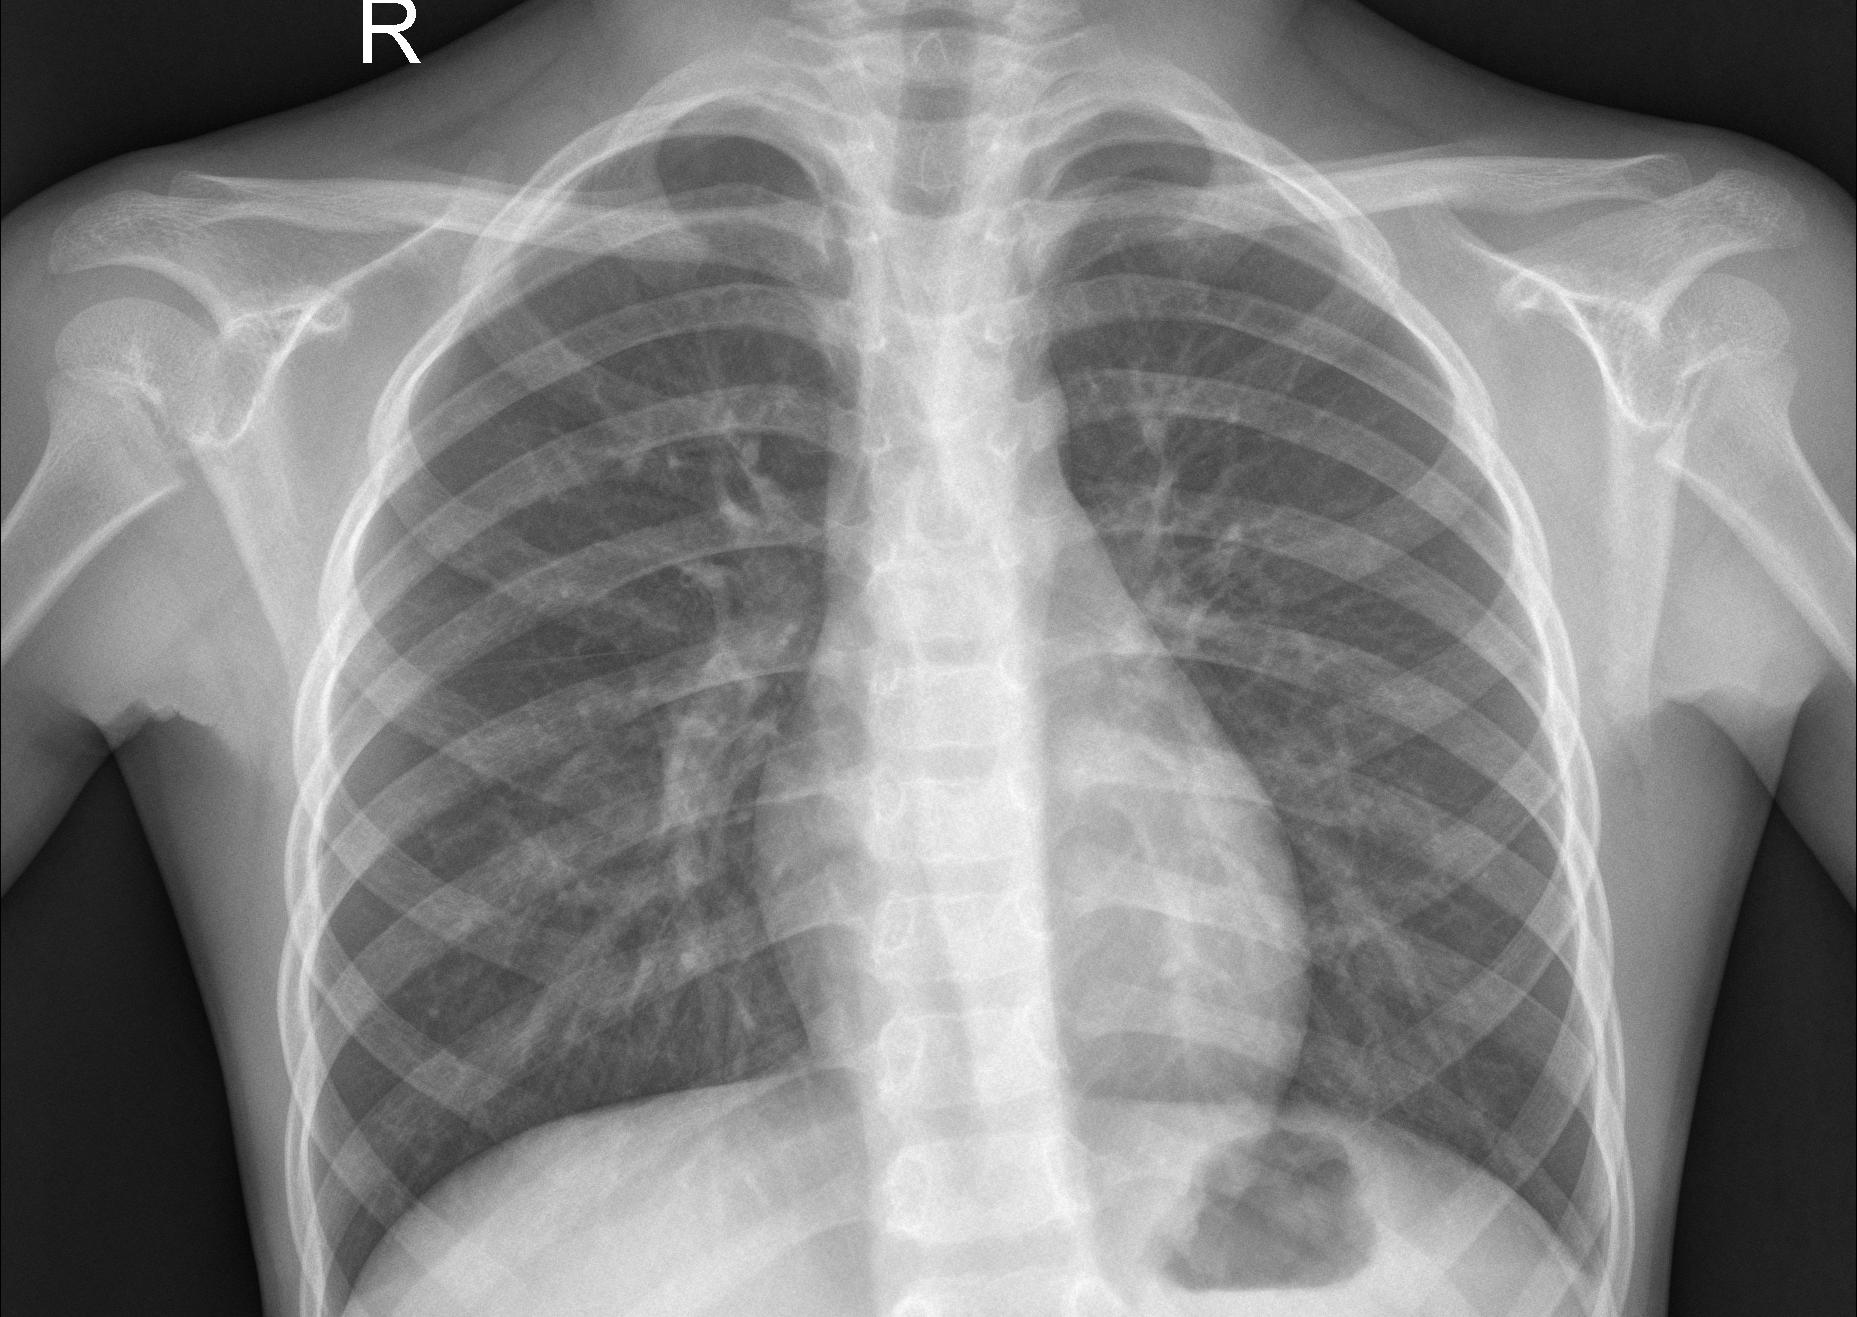

In [6]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

image=PIL.Image.open(r'C:\Users\Prajjawal Mishra\AppData\Local\Temp\8cb8ce1d-4fe6-452b-8bee-c93945e19594_archive (1).zip.594\chest_xray\chest_xray\test\NORMAL\IM-0001-0001.jpeg')
image

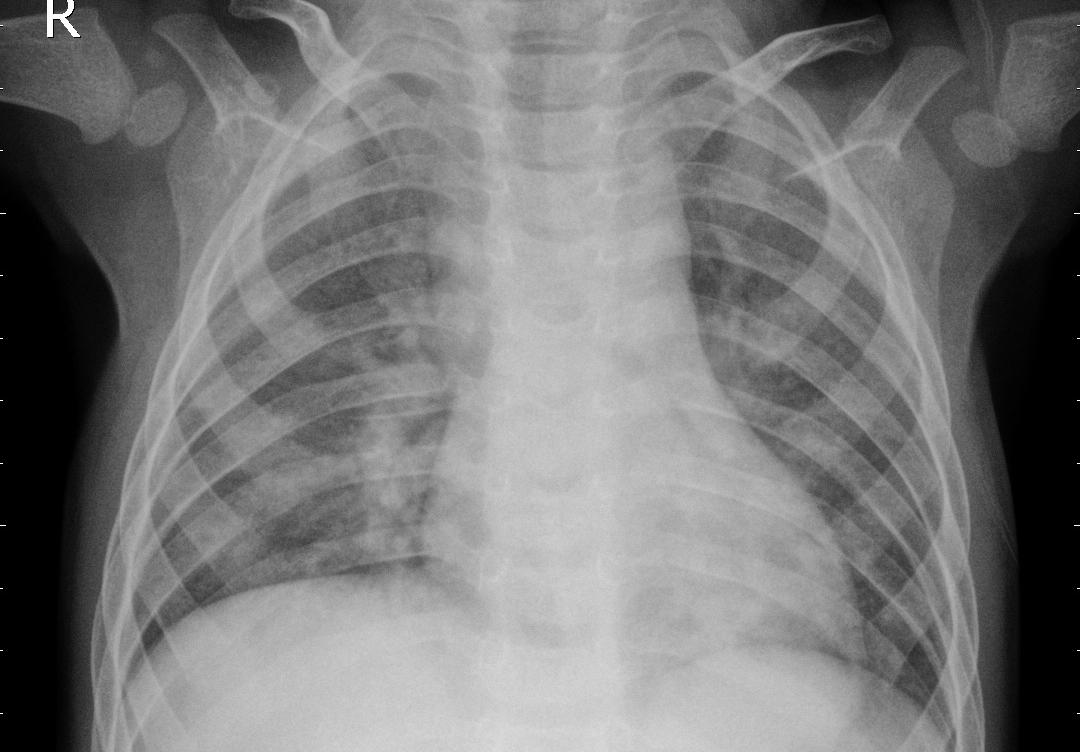

In [23]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt
image=PIL.Image.open(r'C:\Users\Prajjawal Mishra\AppData\Local\Temp\c7ec0bd9-aeb0-428e-91c8-de5e7ca5ccc7_archive (1).zip.cc7\chest_xray\chest_xray\test\PNEUMONIA\person37_virus_82.jpeg')
image

In [7]:
training_dir=r'C:\Users\Prajjawal Mishra\Downloads\input\chest_xray\train'
training_generator=ImageDataGenerator(rescale=1/255)
data_train=training_generator.flow_from_directory(training_dir,target_size=(120,120),batch_size=8,class_mode='binary')


test_dir=r'C:\Users\Prajjawal Mishra\Downloads\input\chest_xray\test'
test_generator=ImageDataGenerator(rescale=1/255)
data_test=test_generator.flow_from_directory(test_dir,target_size=(120,120),batch_size=8,class_mode='binary')



valid_dir=r'C:\Users\Prajjawal Mishra\Downloads\input\chest_xray\val'
validation_generator=ImageDataGenerator(rescale=1/255)
data_valid=validation_generator.flow_from_directory(valid_dir,target_size=(120,120),batch_size=8,class_mode='binary')



model=tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(512,(3,3),activation="relu"),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(256,activation="relu"),
                          tf.keras.layers.Dense(1,activation="sigmoid")])

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.




In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [9]:

history=model.fit(data_train,epochs=2,validation_data=data_valid)

Epoch 1/2


652/652 [==============================] - 99s 147ms/step - loss: 0.4775 - acc: 0.7935 - val_loss: 2.2972 - val_acc: 0.6875
Epoch 2/2
652/652 [==============================] - 91s 140ms/step - loss: 0.1662 - acc: 0.9325 - val_loss: 3.0275 - val_acc: 0.6250


In [11]:
model.evaluate(data_test)

78/78 [==============================] - 10s 132ms/step - loss: 1.7755 - acc: 0.6891


[1.7755450010299683, 0.6891025900840759]

In [13]:
predictions=model.predict(data_test)

78/78 [==============================] - 9s 107ms/step


In [14]:
predictions

array([[0.9060526 ],
       [0.9999814 ],
       [0.98064685],
       [0.99232733],
       [0.9999992 ],
       [0.99999976],
       [0.9999992 ],
       [0.99876684],
       [0.9999761 ],
       [0.99990636],
       [0.99999696],
       [0.9437764 ],
       [0.9788839 ],
       [0.23383825],
       [0.9957433 ],
       [0.9998975 ],
       [0.99999565],
       [0.9990665 ],
       [0.99911815],
       [0.9991731 ],
       [0.9999963 ],
       [0.9999975 ],
       [0.6163524 ],
       [0.9999832 ],
       [0.99997663],
       [0.9486765 ],
       [0.9538155 ],
       [0.99999577],
       [0.9999997 ],
       [0.9999992 ],
       [0.97688204],
       [0.9999976 ],
       [0.9966861 ],
       [0.9780503 ],
       [0.05170889],
       [0.9999937 ],
       [0.9999969 ],
       [0.9999987 ],
       [0.99995106],
       [0.99882436],
       [0.99988365],
       [0.20560235],
       [0.9998281 ],
       [0.98858976],
       [0.94692826],
       [0.99997777],
       [0.8376353 ],
       [0.999

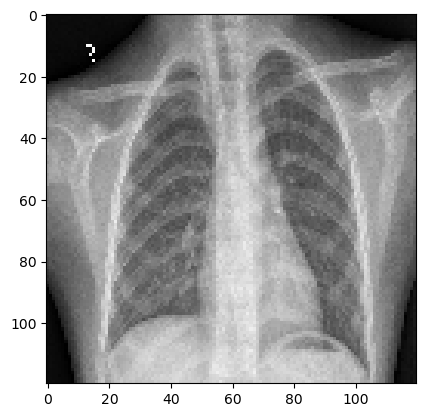

the probability of pneumonia is : [0.9060526]


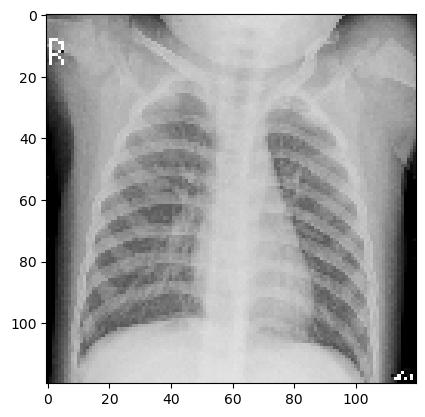

the probability of pneumonia is : [0.9999814]


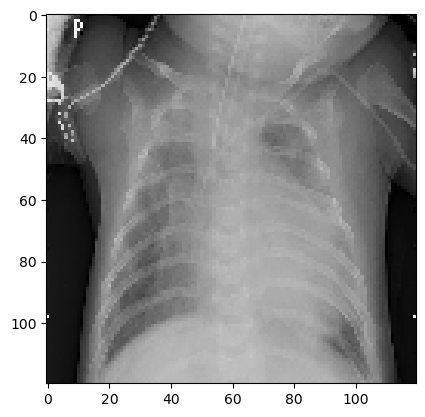

the probability of pneumonia is : [0.98064685]


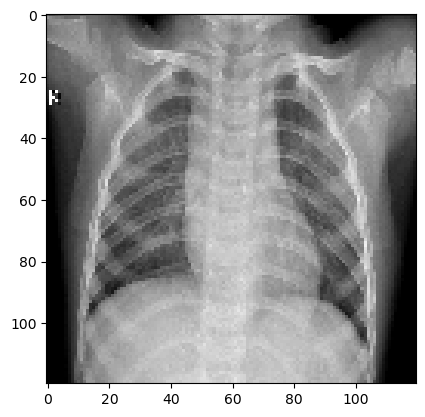

the probability of pneumonia is : [0.99232733]


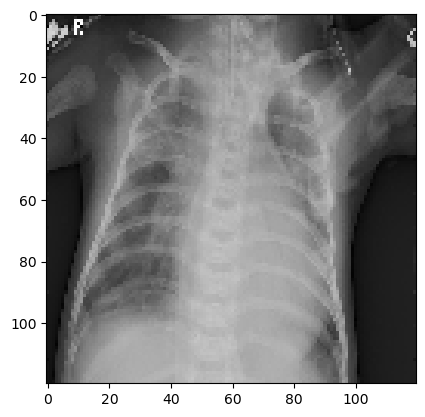

the probability of pneumonia is : [0.9999992]


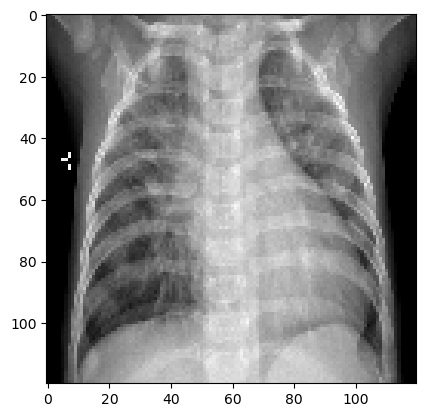

the probability of pneumonia is : [0.99999976]


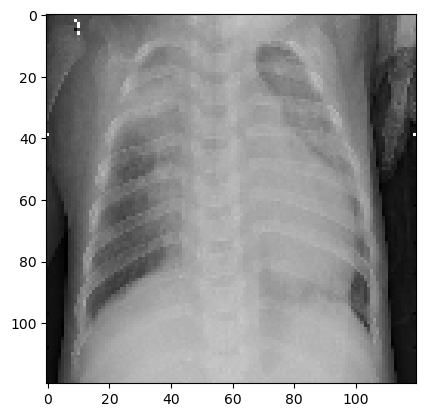

the probability of pneumonia is : [0.9999992]


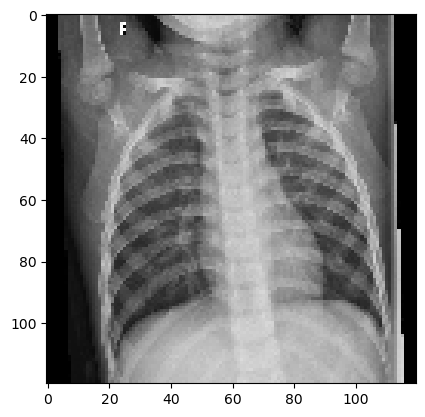

the probability of pneumonia is : [0.99876684]


In [22]:
x=data_test.next()
for i in range(0,1):
    image=x[i]
    for j in range(0,8):
        plt.imshow(image[j])
        plt.show()
        print("the probability of pneumonia is :",predictions[j])